In [1]:
import diags
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from datetime import datetime
import os
from diags import hofx

/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
jedi_hofx_filename = "/lfs5/BMC/wrfruc/gge/RDASApp/expr/hofx/hofx_adpsfc.nc"

# jedi_group = "oman"
jedi_group = "ombg"
#jedi_group = "ObsValue"
# jedi_varname = "specificHumidity"
jedi_varname = "airTemperature"

reference_time = "2023061012"

## Testing Import

In [4]:
hofx_obj = hofx(jedi_hofx_filename, 'uv', ref_time=reference_time, flag=None)

In [5]:
jedi_df = hofx_obj.df

In [8]:
jedi_df

,datetime,latitude,longitude,pressure,station_elevation,station_id,observation_type,qc_flags,analysis_use_flag,u_observation,u_error,u_oman,u_ombg,v_observation,v_error,v_oman,v_ombg
0,1686398400,15.45,272.070007,100660.0,31,78708,281,15,False,1.4,-3.368795e+38,-3.368795e+38,-3.368795e+38,-0.5,-3.368795e+38,-3.368795e+38,-3.368795e+38
1,1686398400,47.799999,355.630005,101060.0,22,07200,292,15,False,0.5,-3.368795e+38,-3.368795e+38,-3.368795e+38,3.0,-3.368795e+38,-3.368795e+38,-3.368795e+38
2,1686398400,52.580002,248.539993,92900.0,721,71010,292,15,False,-3.3,-3.368795e+38,-3.368795e+38,-3.368795e+38,3.9,-3.368795e+38,-3.368795e+38,-3.368795e+38
3,1686398101,28.66,253.970001,85990.0,1472,76225,281,10,False,-1.0,-3.368795e+38,-3.419193e+00,-3.386620e+00,0.0,-3.368795e+38,-7.288238e-01,-7.686118e-01
4,1686398400,12.0,276.230011,100940.0,5,MNBL,287,15,False,0.0,-3.368795e+38,-3.368795e+38,-3.368795e+38,0.0,-3.368795e+38,-3.368795e+38,-3.368795e+38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,1686397980,40.517502,237.701385,99370.0,153,72592,281,10,False,-0.5,-3.368795e+38,3.946907e-01,4.148706e-01,-1.4,-3.368795e+38,-1.556251e-01,-1.949792e-01
8848,1686397860,38.889439,280.142792,94410.0,603,72417,281,10,False,0.0,-3.368795e+38,1.542278e-02,-2.821452e-01,0.0,-3.368795e+38,-9.599032e-01,-1.117769e+00
8849,1686398400,53.1418,140.689697,100150.0,46,31369,281,15,False,-3.5,-3.368795e+38,-3.368795e+38,-3.368795e+38,2.0,-3.368795e+38,-3.368795e+38,-3.368795e+38
8850,1686398400,43.079922,357.682495,96420.0,420,08037,281,15,False,-0.7,-3.368795e+38,-3.368795e+38,-3.368795e+38,-0.4,-3.368795e+38,-3.368795e+38,-3.368795e+38


In [29]:
np.unique(jedi_df['oman'])

array([-6.0516157150268555, -6.0341620445251465, -5.887513637542725, ...,
       5.1321234703063965, 5.162561893463135, 6.504881858825684],
      dtype=object)

In [30]:
jedi_df['oman']

0       0.094595
1      -0.689229
2      -1.596734
3      -0.898643
4       0.271321
          ...   
4225    1.482901
4226    0.578461
4227    0.035134
4228    -0.29551
4229     -0.0852
Name: oman, Length: 4230, dtype: object

In [31]:
hofx_obj.metadata

{'Variable': 't',
 'Date': datetime.datetime(2023, 6, 10, 12, 0),
 'File Type': 'JEDI H(x) diag file',
 'DA System': 'jedi'}

------------ Temperature Data Assimilation Statistics and Plots ------------


Observation Type: 187

Proportion Assimilated: 1.0



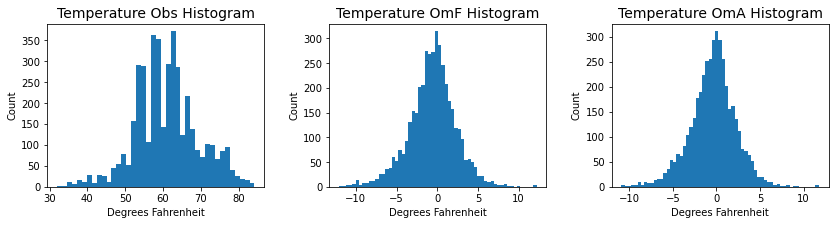

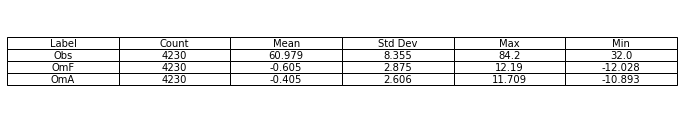

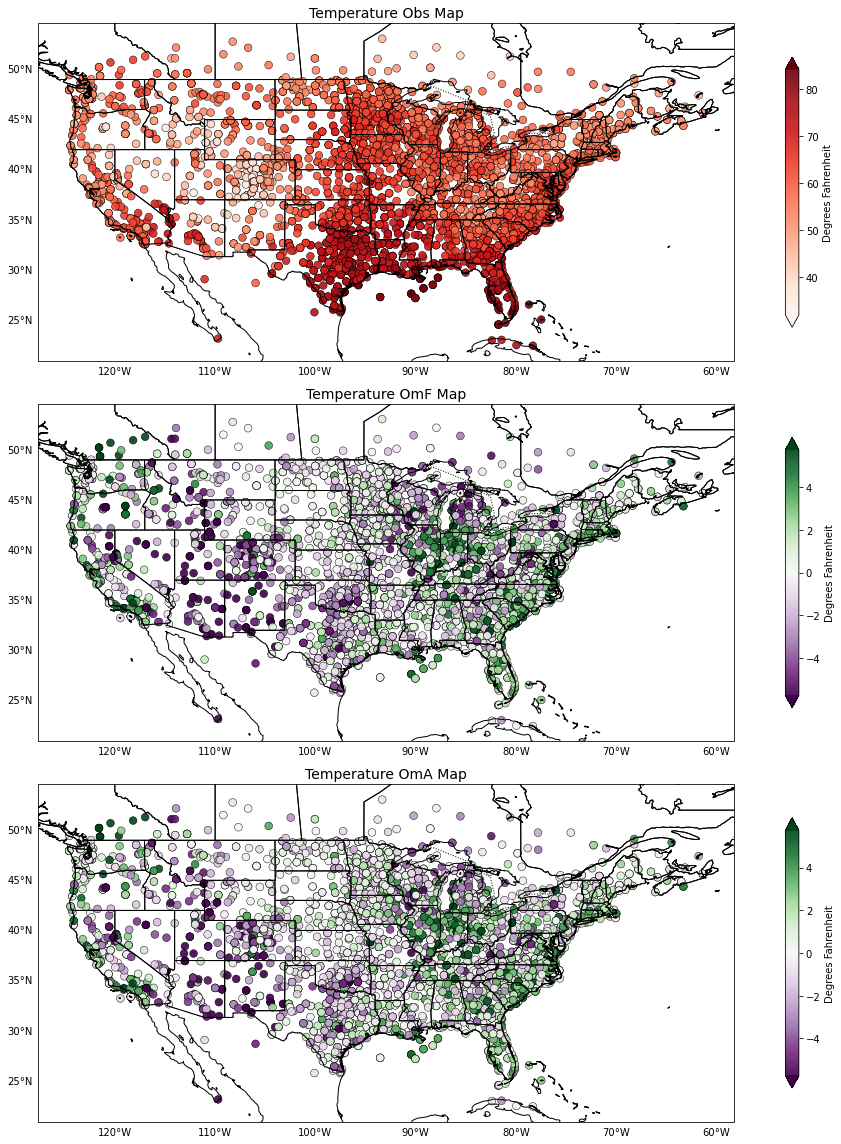

In [32]:
make_base_plots([jedi_df], hofx_obj.metadata)

### Filter df

In [7]:
# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (251, 258) #to convert from deg west to deg east (360 - deg west)

In [8]:
fil_df = filter_df([hofx.df], lat_range=co_lats, lon_range=co_lons)

In [9]:
fil_df = fil_df[0]

In [10]:
fil_df

,latitude,longitude,pressure,station_elevation,station_id,observation_type,error,oman,ombg,observation,qc_flags,analysis_use_flag
10,37.279999,257.380005,86340.0,1335,KSPD,187,2.2585,-1.558405,-1.465091,284.850006,0,True
12,38.43,254.899994,83190.0,1658,K1V6,187,2.2585,0.927731,0.782879,285.149994,0,True
80,37.290001,251.369995,81910.0,1803,KCEZ,187,2.2585,-3.880533,-4.288583,277.049988,0,True
82,38.43,254.899994,83160.0,1658,K1V6,187,2.2585,0.927731,0.782879,285.149994,0,True
149,38.43,254.899994,83160.0,1658,K1V6,187,2.2585,1.927731,1.782879,286.149994,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4007,40.150002,254.839996,84420.0,1541,KLMO,187,2.2585,-0.309188,-0.675133,284.850006,0,True
4027,37.279999,252.949997,76930.0,2334,KPSO,187,2.2585,-2.36193,-3.842163,274.949982,0,True
4074,40.150002,254.839996,84400.0,1541,KLMO,187,2.2585,0.390794,0.024849,285.549988,0,True
4098,37.279999,252.949997,76930.0,2334,KPSO,187,2.2585,-1.261924,-2.742157,276.049988,0,True


In [ ]:
make_base_plots([fil_df], hofx.metadata)

## Sijie's Function Expanded

In [4]:
def read_jedi(filepath, varname, flag=0):

    # Load the NetCDF file
    nc_file = os.path.join(file_dir, filename)
    nc_data = Dataset(nc_file, "r")

    observations = nc_data.groups["ObsValue"].variables[varname][:]
    qc_flags = nc_data.groups["EffectiveQC0"].variables[varname][:]
    
    flag_mask = []
    if flag is not None: # filter by QC
        flag_mask = (qc_flags == flag)
    else: # get all obs
        flag_mask = ~observations.mask
        
    latitude = nc_data.groups["MetaData"].variables["latitude"][:][flag_mask]
    longitude = nc_data.groups["MetaData"].variables["longitude"][:][flag_mask]
    pressure = nc_data.groups["MetaData"].variables["pressure"][:][flag_mask]
    elevation = nc_data.groups["MetaData"].variables["stationElevation"][:][flag_mask]
    station_id = nc_data.groups["MetaData"].variables["stationIdentification"][:][flag_mask]
    observation_type = nc_data.groups["MetaData"].variables["prepbufrReportType"][:][flag_mask]
    #     error = nc_data.groups["DerivedObsError"].variables[varname][:][flag_mask]
    error = nc_data.groups["EffectiveError0"].variables[varname][:][flag_mask]
    #     time = nc_data.groups["MetaData"].variables["dateTime"][:][flag_mask]
    oman = nc_data.groups["oman"].variables[varname][:][flag_mask]
    ombg = nc_data.groups["ombg"].variables[varname][:][flag_mask]
    observations = observations[:][flag_mask]
    qc_flags = qc_flags[:][flag_mask]
    analysis_use_flag = (qc_flags == 0)

    data_jedi = np.column_stack((latitude, longitude, pressure, elevation,
                                 station_id, observation_type, error, oman, ombg, 
                                 observations, qc_flags, analysis_use_flag))
    df_jedi = pd.DataFrame(data_jedi, columns=['latitude', 'longitude', 'pressure', 'elevation',
                                               'station_id', 'observation_type', 'error', 'oman',
                                              'ombg', 'observation', 'qc_flags', 'analysis_use_flag'])
    nc_data.close()

    return df_jedi

In [6]:
df_jedi = read_jedi(jedi_hofx_filename, jedi_varname, flag=0)

In [7]:
df_jedi

,latitude,longitude,pressure,elevation,station_id,observation_type,error,oman,ombg,observation,qc_flags,analysis_use_flag
0,27.209999,261.880005,100470.0,34,KBKS,187,2.2585,0.094595,-0.061125,298.449982,0,True
1,28.200001,259.98999,98160.0,236,KFTN,187,2.2585,-0.689229,-0.9203,297.149994,0,True
2,29.709999,261.950012,98640.0,197,KBAZ,187,2.2585,-1.596734,-1.819327,295.350006,0,True
3,30.9,276.119995,100330.0,80,KTVI,187,2.2585,-0.898643,-1.196214,294.149994,0,True
4,31.469999,277.149994,100430.0,78,KDQH,187,2.2585,0.271321,0.157041,295.850006,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4225,44.990002,263.820007,96990.0,330,KDXX,187,2.2585,1.482901,1.347904,294.149994,0,True
4226,46.830002,264.119995,96080.0,426,KDTL,187,2.2585,0.578461,0.54829,290.149994,0,True
4227,48.150002,265.480011,96970.0,360,KVWU,187,2.2585,0.035134,0.120687,289.149994,0,True
4228,48.400002,262.630005,98510.0,251,KGAF,187,2.2585,-0.29551,-0.439267,288.149994,0,True


# Read JEDI Hofx file

In [3]:
jedi_fp = '/lfs5/BMC/wrfruc/gge/RDASApp/expr/hofx/hofx_adpsfc.nc'
gsi_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'

In [1]:
# f = Dataset(gsi_fp, mode='r')
# for var in f.variables:
#      print(var)

In [61]:
f = Dataset(jedi_fp, mode='r')
# for grp in f.groups:
#      print(f'{grp}')

In [62]:
# print(f.dimensions)

In [81]:
data_dict = {}

for group in f.groups.values():
    print(f'--- {group.name} ---\n')
    for grp in group.variables.values():
        print(grp.name)
#         print(type(grp[:]))
        data = grp[:]
        data_dict[f"{group.name}_{grp.name}"] = data
    print("\n")

df = pd.DataFrame(data_dict)

--- DerivedObsError ---

specificHumidity
surfacePressure
windEastward
windNorthward


--- DerivedObsValue ---

surfacePressure


--- EffectiveError0 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- EffectiveError1 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- EffectiveError2 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- EffectiveQC0 ---

specificHumidity
surfacePressure
airTemperature
windEastward
windNorthward


--- EffectiveQC1 ---

specificHumidity
surfacePressure
airTemperature
windEastward
windNorthward


--- EffectiveQC2 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- MetaData ---

stationIdentification
prepbufrDataLvlCat
longitude
stationElevation
latitude
prepbufrReportType
seaTemperatureMethod
pressure
dateTime
height
dumpReportType


--- ObsBias0 ---

specificHumidity
surfacePressure
airTemperature
windEastward
windNorthwa

In [79]:
# for column in df.columns:
#     if df[column].isna().any():
#         i = 2
#     else:
#         print(f"Column '{column}' does not contain NaN values.")

In [85]:
obs_values =  ['specificHumidity', 'airTemperature', 'surfacePressure',
               'windEastward', 'windNorthward']

In [86]:
dfs = {}

In [87]:
for var_name in obs_values:
    col_name = f'ObsValue_{var_name}'
    df_fil = df.dropna(subset=[col_name])
    df_fil = df_fil.dropna(axis=1, how='all')
    dfs[var_name] = df_fil

KeyError: ['ObsValue_surfacePressure']

In [78]:
for var_name, df in dfs.items():
    print(var_name)
    oma_col = f'oman_{var_name}'
    nan_proportion = df[oma_col].isna().mean()
    print(f'Prop NaN: {nan_proportion}')

specificHumidity
Prop NaN: 0.4198447893569845
airTemperature
Prop NaN: 0.42278203723986857
windEastward
Prop NaN: 0.4176457297785811
windNorthward
Prop NaN: 0.4176457297785811


In [40]:
df

,DerivedObsError_specificHumidity,DerivedObsError_surfacePressure,DerivedObsError_windEastward,DerivedObsError_windNorthward,DerivedObsValue_surfacePressure,EffectiveError0_airTemperature,EffectiveError0_specificHumidity,EffectiveError0_surfacePressure,EffectiveError0_windEastward,EffectiveError0_windNorthward,EffectiveError1_airTemperature,EffectiveError1_specificHumidity,EffectiveError1_surfacePressure,EffectiveError1_windEastward,EffectiveError1_windNorthward,EffectiveError2_airTemperature,EffectiveError2_specificHumidity,EffectiveError2_surfacePressure,EffectiveError2_windEastward,EffectiveError2_windNorthward,EffectiveQC0_specificHumidity,EffectiveQC0_surfacePressure,EffectiveQC0_airTemperature,EffectiveQC0_windEastward,EffectiveQC0_windNorthward,EffectiveQC1_specificHumidity,EffectiveQC1_surfacePressure,EffectiveQC1_airTemperature,EffectiveQC1_windEastward,EffectiveQC1_windNorthward,EffectiveQC2_airTemperature,EffectiveQC2_specificHumidity,EffectiveQC2_surfacePressure,EffectiveQC2_windEastward,EffectiveQC2_windNorthward,MetaData_stationIdentification,MetaData_prepbufrDataLvlCat,MetaData_longitude,MetaData_stationElevation,MetaData_latitude,MetaData_prepbufrReportType,MetaData_seaTemperatureMethod,MetaData_pressure,MetaData_dateTime,MetaData_height,MetaData_dumpReportType,ObsBias0_specificHumidity,ObsBias0_surfacePressure,ObsBias0_airTemperature,ObsBias0_windEastward,ObsBias0_windNorthward,ObsBias1_specificHumidity,ObsBias1_surfacePressure,ObsBias1_airTemperature,ObsBias1_windEastward,ObsBias1_windNorthward,ObsBias2_specificHumidity,ObsBias2_surfacePressure,ObsBias2_airTemperature,ObsBias2_windEastward,ObsBias2_windNorthward,ObsError_airTemperature,ObsError_relativeHumidity,ObsError_seaTemperature,ObsError_pressure,ObsError_wind,ObsType_specificHumidity,ObsType_windEastward,ObsType_airTemperature,ObsType_windNorthward,ObsValue_cloudCoverTotal,ObsValue_heightOfBaseOfCloud,ObsValue_minimumTemperature,ObsValue_heightAboveSurfaceOfBaseOfLowestCloud,ObsValue_seaTemperature,ObsValue_heightOfWaves,ObsValue_airTemperature,ObsValue_maximumWindGustSpeed,ObsValue_depthBelowSeaSurface,ObsValue_windEastward,ObsValue_windNorthward,ObsValue_verticalSignificance,ObsValue_cloudCeiling,ObsValue_presentWeather,ObsValue_cloudAmount,ObsValue_horizontalVisibility,ObsValue_specificHumidity,ObsValue_dewpointTemperature,ObsValue_maximumTemperature,ObsValue_pressureReducedToMeanSeaLevel,QualityMarker_airTemperature,QualityMarker_pressure,QualityMarker_seaTemperature,QualityMarker_pressureReducedToMeanSeaLevel,QualityMarker_specificHumidity,QualityMarker_height,QualityMarker_wind,TunedObsError_airTemperature,TunedObsError_relativeHumidity,TunedObsError_pressure,TunedObsError_wind,hofx0_specificHumidity,hofx0_surfacePressure,hofx0_airTemperature,hofx0_windEastward,hofx0_windNorthward,hofx1_specificHumidity,hofx1_surfacePressure,hofx1_airTemperature,hofx1_windEastward,hofx1_windNorthward,hofx2_specificHumidity,hofx2_surfacePressure,hofx2_airTemperature,hofx2_windEastward,hofx2_windNorthward,oman_specificHumidity,oman_surfacePressure,oman_airTemperature,oman_windEastward,oman_windNorthward,ombg_specificHumidity,ombg_surfacePressure,ombg_airTemperature,ombg_windEastward,ombg_windNorthward
0,NaN,NaN,NaN,NaN,100660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,78708,6,272.070007,31,15.450000,281,NaN,100660.0,1686398400,NaN,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,281,281,281,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,101060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,07200,6,355.630005,22,47.799999,292,NaN,101060.0,1686398400,NaN,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [41]:
dfs['ObsValue_airTemperature']

,DerivedObsValue_surfacePressure,EffectiveError0_airTemperature,EffectiveError0_specificHumidity,EffectiveError0_surfacePressure,EffectiveError1_airTemperature,EffectiveError1_specificHumidity,EffectiveError1_surfacePressure,EffectiveError2_airTemperature,EffectiveError2_specificHumidity,EffectiveError2_surfacePressure,EffectiveQC0_specificHumidity,EffectiveQC0_surfacePressure,EffectiveQC0_airTemperature,EffectiveQC0_windEastward,EffectiveQC0_windNorthward,EffectiveQC1_specificHumidity,EffectiveQC1_surfacePressure,EffectiveQC1_airTemperature,EffectiveQC1_windEastward,EffectiveQC1_windNorthward,EffectiveQC2_airTemperature,EffectiveQC2_specificHumidity,EffectiveQC2_surfacePressure,EffectiveQC2_windEastward,EffectiveQC2_windNorthward,MetaData_stationIdentification,MetaData_prepbufrDataLvlCat,MetaData_longitude,MetaData_stationElevation,MetaData_latitude,MetaData_prepbufrReportType,MetaData_pressure,MetaData_dateTime,MetaData_height,MetaData_dumpReportType,ObsBias0_specificHumidity,ObsBias0_surfacePressure,ObsBias0_airTemperature,ObsBias0_windEastward,ObsBias0_windNorthward,ObsBias1_specificHumidity,ObsBias1_surfacePressure,ObsBias1_airTemperature,ObsBias1_windEastward,ObsBias1_windNorthward,ObsBias2_specificHumidity,ObsBias2_surfacePressure,ObsBias2_airTemperature,ObsBias2_windEastward,ObsBias2_windNorthward,ObsType_specificHumidity,ObsType_windEastward,ObsType_airTemperature,ObsType_windNorthward,ObsValue_cloudCoverTotal,ObsValue_heightOfBaseOfCloud,ObsValue_minimumTemperature,ObsValue_heightAboveSurfaceOfBaseOfLowestCloud,ObsValue_seaTemperature,ObsValue_airTemperature,ObsValue_maximumWindGustSpeed,ObsValue_verticalSignificance,ObsValue_cloudCeiling,ObsValue_presentWeather,ObsValue_cloudAmount,ObsValue_horizontalVisibility,ObsValue_specificHumidity,ObsValue_dewpointTemperature,ObsValue_maximumTemperature,ObsValue_pressureReducedToMeanSeaLevel,QualityMarker_airTemperature,QualityMarker_pressure,QualityMarker_seaTemperature,QualityMarker_pressureReducedToMeanSeaLevel,QualityMarker_specificHumidity,QualityMarker_height,hofx0_specificHumidity,hofx0_surfacePressure,hofx0_airTemperature,hofx0_windEastward,hofx0_windNorthward,hofx1_specificHumidity,hofx1_surfacePressure,hofx1_airTemperature,hofx1_windEastward,hofx1_windNorthward,hofx2_specificHumidity,hofx2_surfacePressure,hofx2_airTemperature,hofx2_windEastward,hofx2_windNorthward,oman_specificHumidity,oman_surfacePressure,oman_airTemperature,ombg_specificHumidity,ombg_surfacePressure,ombg_airTemperature
2,90240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,15,10,10,15,15,15,10,10,15,15,15,10,10,11366,0,12.730000,980,47.419998,181,90240.0,1686398400,980.0,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,181,181,181,NaN,NaN,NaN,14.0,NaN,294.049988,NaN,NaN,NaN,NaN,NaN,NaN,0.008225,282.649994,NaN,NaN,2.0,2,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,15,10,10,15,15,15,10,10,15,15,15,10,10,06740,0,8.420000,3094,46.770000,181,70040.0,1686398400,3094.0,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,181,181,181,NaN,NaN,NaN,14.0,NaN,276.949982,4.6,NaN,NaN,NaN,NaN,NaN,0.006661,275.949982,NaN,NaN,2.0,2,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,101260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,71426,0,290.450012,5,48.060001,192,101260.0,1686398400,5.0,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192,192,192,192,NaN,NaN,279.950012,14.0,NaN,282.549988,NaN,NaN,NaN,NaN,NaN,NaN,0.006616,281.149994,283.450012,NaN,2.0,3,NaN,NaN,3.0,3.0,0.006084,99791.273438,280.755737,-0.668625,-1.369962,0.006086,99801.648438,280.817596,-0.756523,-1.516440,0.006086,99801.648438,280.817474,-0.756491,-1.516588,0.000530,1458.354248,1.732508,0.000532,1468.724365,1.794252
6,92040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,71

In [42]:
dfs['ObsValue_specificHumidity']

,DerivedObsValue_surfacePressure,EffectiveError0_airTemperature,EffectiveError0_specificHumidity,EffectiveError0_surfacePressure,EffectiveError1_airTemperature,EffectiveError1_specificHumidity,EffectiveError1_surfacePressure,EffectiveError2_airTemperature,EffectiveError2_specificHumidity,EffectiveError2_surfacePressure,EffectiveQC0_specificHumidity,EffectiveQC0_surfacePressure,EffectiveQC0_airTemperature,EffectiveQC0_windEastward,EffectiveQC0_windNorthward,EffectiveQC1_specificHumidity,EffectiveQC1_surfacePressure,EffectiveQC1_airTemperature,EffectiveQC1_windEastward,EffectiveQC1_windNorthward,EffectiveQC2_airTemperature,EffectiveQC2_specificHumidity,EffectiveQC2_surfacePressure,EffectiveQC2_windEastward,EffectiveQC2_windNorthward,MetaData_stationIdentification,MetaData_prepbufrDataLvlCat,MetaData_longitude,MetaData_stationElevation,MetaData_latitude,MetaData_prepbufrReportType,MetaData_pressure,MetaData_dateTime,MetaData_height,MetaData_dumpReportType,ObsBias0_specificHumidity,ObsBias0_surfacePressure,ObsBias0_airTemperature,ObsBias0_windEastward,ObsBias0_windNorthward,ObsBias1_specificHumidity,ObsBias1_surfacePressure,ObsBias1_airTemperature,ObsBias1_windEastward,ObsBias1_windNorthward,ObsBias2_specificHumidity,ObsBias2_surfacePressure,ObsBias2_airTemperature,ObsBias2_windEastward,ObsBias2_windNorthward,ObsType_specificHumidity,ObsType_windEastward,ObsType_airTemperature,ObsType_windNorthward,ObsValue_cloudCoverTotal,ObsValue_heightOfBaseOfCloud,ObsValue_minimumTemperature,ObsValue_heightAboveSurfaceOfBaseOfLowestCloud,ObsValue_seaTemperature,ObsValue_airTemperature,ObsValue_maximumWindGustSpeed,ObsValue_verticalSignificance,ObsValue_cloudCeiling,ObsValue_presentWeather,ObsValue_cloudAmount,ObsValue_horizontalVisibility,ObsValue_specificHumidity,ObsValue_dewpointTemperature,ObsValue_maximumTemperature,ObsValue_pressureReducedToMeanSeaLevel,QualityMarker_airTemperature,QualityMarker_pressure,QualityMarker_seaTemperature,QualityMarker_pressureReducedToMeanSeaLevel,QualityMarker_specificHumidity,QualityMarker_height,hofx0_specificHumidity,hofx0_surfacePressure,hofx0_airTemperature,hofx0_windEastward,hofx0_windNorthward,hofx1_specificHumidity,hofx1_surfacePressure,hofx1_airTemperature,hofx1_windEastward,hofx1_windNorthward,hofx2_specificHumidity,hofx2_surfacePressure,hofx2_airTemperature,hofx2_windEastward,hofx2_windNorthward,oman_specificHumidity,oman_surfacePressure,oman_airTemperature,ombg_specificHumidity,ombg_surfacePressure,ombg_airTemperature
2,90240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,15,10,10,15,15,15,10,10,15,15,15,10,10,11366,0,12.730000,980,47.419998,181,90240.0,1686398400,980.0,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,181,181,181,NaN,NaN,NaN,14.0,NaN,294.049988,NaN,NaN,NaN,NaN,NaN,NaN,0.008225,282.649994,NaN,NaN,2.0,2,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,15,10,10,15,15,15,10,10,15,15,15,10,10,06740,0,8.420000,3094,46.770000,181,70040.0,1686398400,3094.0,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,181,181,181,NaN,NaN,NaN,14.0,NaN,276.949982,4.6,NaN,NaN,NaN,NaN,NaN,0.006661,275.949982,NaN,NaN,2.0,2,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,101260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,71426,0,290.450012,5,48.060001,192,101260.0,1686398400,5.0,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192,192,192,192,NaN,NaN,279.950012,14.0,NaN,282.549988,NaN,NaN,NaN,NaN,NaN,NaN,0.006616,281.149994,283.450012,NaN,2.0,3,NaN,NaN,3.0,3.0,0.006084,99791.273438,280.755737,-0.668625,-1.369962,0.006086,99801.648438,280.817596,-0.756523,-1.51644,0.006086,99801.648438,280.817474,-0.756491,-1.516588,0.000530,1458.354248,1.732508,0.000532,1468.724365,1.794252
6,92040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,719

In [43]:
dfs['ObsValue_windEastward']

,DerivedObsValue_surfacePressure,EffectiveError0_windEastward,EffectiveError0_windNorthward,EffectiveError1_windEastward,EffectiveError1_windNorthward,EffectiveError2_windEastward,EffectiveError2_windNorthward,EffectiveQC0_specificHumidity,EffectiveQC0_surfacePressure,EffectiveQC0_airTemperature,EffectiveQC0_windEastward,EffectiveQC0_windNorthward,EffectiveQC1_specificHumidity,EffectiveQC1_surfacePressure,EffectiveQC1_airTemperature,EffectiveQC1_windEastward,EffectiveQC1_windNorthward,EffectiveQC2_airTemperature,EffectiveQC2_specificHumidity,EffectiveQC2_surfacePressure,EffectiveQC2_windEastward,EffectiveQC2_windNorthward,MetaData_stationIdentification,MetaData_prepbufrDataLvlCat,MetaData_longitude,MetaData_stationElevation,MetaData_latitude,MetaData_prepbufrReportType,MetaData_pressure,MetaData_dateTime,MetaData_dumpReportType,ObsBias0_specificHumidity,ObsBias0_surfacePressure,ObsBias0_airTemperature,ObsBias0_windEastward,ObsBias0_windNorthward,ObsBias1_specificHumidity,ObsBias1_surfacePressure,ObsBias1_airTemperature,ObsBias1_windEastward,ObsBias1_windNorthward,ObsBias2_specificHumidity,ObsBias2_surfacePressure,ObsBias2_airTemperature,ObsBias2_windEastward,ObsBias2_windNorthward,ObsType_specificHumidity,ObsType_windEastward,ObsType_airTemperature,ObsType_windNorthward,ObsValue_windEastward,ObsValue_windNorthward,QualityMarker_pressure,QualityMarker_wind,hofx0_specificHumidity,hofx0_surfacePressure,hofx0_airTemperature,hofx0_windEastward,hofx0_windNorthward,hofx1_specificHumidity,hofx1_surfacePressure,hofx1_airTemperature,hofx1_windEastward,hofx1_windNorthward,hofx2_specificHumidity,hofx2_surfacePressure,hofx2_airTemperature,hofx2_windEastward,hofx2_windNorthward,oman_surfacePressure,oman_windEastward,oman_windNorthward,ombg_surfacePressure,ombg_windEastward,ombg_windNorthward
0,100660.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,78708,6,272.070007,31,15.450000,281,100660.0,1686398400,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281,281,281,281,1.4,-0.5,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101060.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,07200,6,355.630005,22,47.799999,292,101060.0,1686398400,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292,292,292,292,0.5,3.0,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92900.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,71010,6,248.539993,721,52.580002,292,92900.0,1686398400,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292,292,292,292,-3.3,3.9,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,85990.0,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,76225,6,253.970001,1472,28.660000,281,85990.0,1686398101,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281,281,281,281,-1.0,0.0,2,2.0,0.005747,85140.625000,291.027222,2.386620,0.768612,0.005953,85140.789062,290.881714,2.419183,0.728842,0.005953,85140.789062,290.881683,2.419193,0.728824,849.209229,-3.419193,-0.728824,849.372681,-3.386620,-0.768612
10,100940.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,MNBL,6,276.230011,5,12.000000,287,100940.0,1686398400,512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287,287,287,287,0.0,0.0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,99370.0,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,72592,6,237.701385,153,40.517502,281,99370.0,1686397980,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [44]:
dfs['ObsValue_windNorthward']

,DerivedObsValue_surfacePressure,EffectiveError0_windEastward,EffectiveError0_windNorthward,EffectiveError1_windEastward,EffectiveError1_windNorthward,EffectiveError2_windEastward,EffectiveError2_windNorthward,EffectiveQC0_specificHumidity,EffectiveQC0_surfacePressure,EffectiveQC0_airTemperature,EffectiveQC0_windEastward,EffectiveQC0_windNorthward,EffectiveQC1_specificHumidity,EffectiveQC1_surfacePressure,EffectiveQC1_airTemperature,EffectiveQC1_windEastward,EffectiveQC1_windNorthward,EffectiveQC2_airTemperature,EffectiveQC2_specificHumidity,EffectiveQC2_surfacePressure,EffectiveQC2_windEastward,EffectiveQC2_windNorthward,MetaData_stationIdentification,MetaData_prepbufrDataLvlCat,MetaData_longitude,MetaData_stationElevation,MetaData_latitude,MetaData_prepbufrReportType,MetaData_pressure,MetaData_dateTime,MetaData_dumpReportType,ObsBias0_specificHumidity,ObsBias0_surfacePressure,ObsBias0_airTemperature,ObsBias0_windEastward,ObsBias0_windNorthward,ObsBias1_specificHumidity,ObsBias1_surfacePressure,ObsBias1_airTemperature,ObsBias1_windEastward,ObsBias1_windNorthward,ObsBias2_specificHumidity,ObsBias2_surfacePressure,ObsBias2_airTemperature,ObsBias2_windEastward,ObsBias2_windNorthward,ObsType_specificHumidity,ObsType_windEastward,ObsType_airTemperature,ObsType_windNorthward,ObsValue_windEastward,ObsValue_windNorthward,QualityMarker_pressure,QualityMarker_wind,hofx0_specificHumidity,hofx0_surfacePressure,hofx0_airTemperature,hofx0_windEastward,hofx0_windNorthward,hofx1_specificHumidity,hofx1_surfacePressure,hofx1_airTemperature,hofx1_windEastward,hofx1_windNorthward,hofx2_specificHumidity,hofx2_surfacePressure,hofx2_airTemperature,hofx2_windEastward,hofx2_windNorthward,oman_surfacePressure,oman_windEastward,oman_windNorthward,ombg_surfacePressure,ombg_windEastward,ombg_windNorthward
0,100660.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,78708,6,272.070007,31,15.450000,281,100660.0,1686398400,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281,281,281,281,1.4,-0.5,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101060.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,07200,6,355.630005,22,47.799999,292,101060.0,1686398400,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292,292,292,292,0.5,3.0,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92900.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,71010,6,248.539993,721,52.580002,292,92900.0,1686398400,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292,292,292,292,-3.3,3.9,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,85990.0,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,76225,6,253.970001,1472,28.660000,281,85990.0,1686398101,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281,281,281,281,-1.0,0.0,2,2.0,0.005747,85140.625000,291.027222,2.386620,0.768612,0.005953,85140.789062,290.881714,2.419183,0.728842,0.005953,85140.789062,290.881683,2.419193,0.728824,849.209229,-3.419193,-0.728824,849.372681,-3.386620,-0.768612
10,100940.0,NaN,NaN,NaN,NaN,NaN,NaN,10,15,10,15,15,10,15,10,15,15,10,10,15,15,15,MNBL,6,276.230011,5,12.000000,287,100940.0,1686398400,512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287,287,287,287,0.0,0.0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,99370.0,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,72592,6,237.701385,153,40.517502,281,99370.0,1686397980,511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [11]:
df_dict = {}
f = None

try:
    if(jedi_fp.endswith('.gz')):
        with gzip.open(jedi_fp, 'rb') as f_gz:
           # Read the file into a buffer (in memory not disk)
           buffer = io.BytesIO(f_gz.read())
           # Open from the buffer
           f = Dataset('dummy', mode='r', memory=buffer.read())
    else:
        f = Dataset(jedi_fp, mode='r')

    # Open netCDF file, store data into dictionary
    for grp in f.groups:
        f.group.variables
        df_dict[grp] = data

except FileNotFoundError:
    raise FileNotFoundError(f"File '{jedi_fp}' not found")
except Exception as e:
    raise RuntimeError(f"An error occurred: {e}")

# Ensure we close the netcdf file since we didn't use 'with'
finally:
    if f is not None:
        f.close()

RuntimeError: An error occurred: NetCDF: Attribute not found